## Chicago Open Data Portal

### Loading the data by calling the API

In [ ]:
api_url = "https://data.cityofchicago.org/resource/n26f-ihde.csv?$query=SELECT%20trip_id%2C%20trip_start_timestamp%2C%20trip_end_timestamp%2C%20trip_seconds%2C%20trip_miles%2C%20percent_time_chicago%2C%20percent_distance_chicago%2C%20pickup_census_tract%2C%20dropoff_census_tract%2C%20pickup_community_area%2C%20dropoff_community_area%2C%20fare%2C%20tip%2C%20additional_charges%2C%20trip_total%2C%20shared_trip_authorized%2C%20shared_trip_match%2C%20trips_pooled%2C%20pickup_centroid_latitude%2C%20pickup_centroid_longitude%2C%20pickup_centroid_location%2C%20dropoff_centroid_latitude%2C%20dropoff_centroid_longitude%2C%20dropoff_centroid_location%20WHERE%20trip_start_timestamp%20BETWEEN%20'2024-01-01T00:00:00'%20AND%20'2024-06-30T23:59:59'"


In [ ]:
import requests

# Base URL for the API
# base_url = "https://data.cityofchicago.org/resource/n26f-ihde.csv"


# Set the number of rows to download (625,000 rows)
rows_to_download = 2000000

# Create a file to store the dataset
output_file = 'data_2024_May_W2.csv'

# Construct the URL with limit
# url = f"{base_url}?$select=trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,percent_time_chicago,percent_distance_chicago,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,shared_trip_authorized,shared_trip_match,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location&$limit={rows_to_download}"
url = api_url = api_url = "https://data.cityofchicago.org/resource/n26f-ihde.csv?$query=SELECT%20trip_id%2C%20trip_start_timestamp%2C%20trip_end_timestamp%2C%20trip_seconds%2C%20trip_miles%2C%20percent_time_chicago%2C%20percent_distance_chicago%2C%20pickup_census_tract%2C%20dropoff_census_tract%2C%20pickup_community_area%2C%20dropoff_community_area%2C%20fare%2C%20tip%2C%20additional_charges%2C%20trip_total%2C%20shared_trip_authorized%2C%20shared_trip_match%2C%20trips_pooled%2C%20pickup_centroid_latitude%2C%20pickup_centroid_longitude%2C%20pickup_centroid_location%2C%20dropoff_centroid_latitude%2C%20dropoff_centroid_longitude%2C%20dropoff_centroid_location%20WHERE%20trip_start_timestamp%20BETWEEN%20'2024-05-08T00:00:00'%20AND%20'2024-05-14T23:59:59'%20LIMIT%202000000"



try:
    # Download the data
    response = requests.get(url, timeout=60)
    response.raise_for_status()

    # Save the data to a CSV file
    with open(output_file, 'wb') as f:
        f.write(response.content)

    print(f"Successfully downloaded the data.")

except requests.exceptions.ReadTimeout:
    print(f"The request timed out. Please try again later.")
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")


Successfully downloaded the data.


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame

# data = pd.read_csv("data_200MB.csv")
data = pd.read_csv("data_2024_May_W2.csv")


* `trip_id`: A unique identifier for each trip, likely an alphanumeric code used to distinguish one trip from another.

* `trip_start_timestamp`: The date and time when the trip started, typically in a standardized format like ISO 8601 (e.g., "2024-08-31T23:45:00.000").

* `trip_end_timestamp`: The date and time when the trip ended, also in a standardized format.

* `trip_seconds`: The total duration of the trip in seconds, calculated from the start and end times.

* `trip_miles`: The distance traveled during the trip in miles.

* `percent_time_chicago`: The percentage of the trip duration that occurred within the Chicago city limits.

* `percent_distance_chicago`: The percentage of the total trip distance that was traveled within the Chicago city limits.

* `pickup_census_tract`: The census tract where the passenger was picked up. A census tract is a geographic region defined for the purpose of taking a census, often used for demographic or statistical analysis.

* `dropoff_census_tract`: The census tract where the passenger was dropped off.

* `pickup_community_area`: The community area of Chicago where the passenger was picked up. Chicago has 77 officially defined community areas.

* `dropoff_community_area`: The community area of Chicago where the passenger was dropped off.

* `fare`: The fare charged for the trip, in monetary terms (e.g., dollars).

* `tip`: The tip amount left by the passenger, also in monetary terms.

* `additional_charges`: Any additional charges applied to the trip, such as tolls, service fees, or surcharges.

* `trip_total`: The total cost of the trip, which includes the fare, tip, and any additional charges.

* `shared_trip_authorized`: A boolean value (True or False) indicating whether the passenger authorized a shared ride (i.e., whether they agreed to share the ride with others, like in a carpooling option).

* `shared_trip_match`: A boolean value indicating whether the trip was actually shared with other passengers (i.e., whether a match for sharing was found during the trip).

* `trips_pooled`: The number of passengers who shared the trip (i.e., how many people were pooled together during the ride).

* `pickup_centroid_latitude`: The latitude coordinate of the pickup location (used for geographic plotting).

* `pickup_centroid_longitude`: The longitude coordinate of the pickup location.

* `dropoff_centroid_latitude`: The latitude coordinate of the dropoff location.

* `dropoff_centroid_longitude`: The longitude coordinate of the dropoff location.

* `pickup_centroid_location.type`: This might refer to the type of geographical feature of the pickup location, typically "Point" for latitude-longitude coordinates.

* `pickup_centroid_location.coordinates`: A list or array containing the geographical coordinates (latitude, longitude) of the pickup location.

* `dropoff_centroid_location.type`: Similar to the pickup location, this would refer to the geographical type of the dropoff location, typically "Point".

* `dropoff_centroid_location.coordinates`: A list or array containing the geographical coordinates (latitude, longitude) of the dropoff location.



In [ ]:
data.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,percent_time_chicago,percent_distance_chicago,pickup_census_tract,dropoff_census_tract,pickup_community_area,...,trip_total,shared_trip_authorized,shared_trip_match,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,000bedf3edb9f43393c136608f62d280f9e7227b,2024-05-08T00:00:00.000,2024-05-08T00:15:00.000,623,2.1500,1.00200,1.000000,1.703108e+10,1.703124e+10,8.0,...,11.23,False,False,1,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.892537,-87.659864,POINT (-87.6598643178 41.8925368719)
1,005ea89a698b2c4cb5e883250fb3c5cdca4b2e6b,2024-05-08T00:00:00.000,2024-05-08T00:15:00.000,1242,17.7649,0.99758,0.995986,1.703198e+10,1.703108e+10,76.0,...,84.93,False,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
2,007a299367d21b81586bdfd6dda9d9d88bc05db0,2024-05-08T00:00:00.000,2024-05-08T00:15:00.000,1306,18.2857,0.99694,0.995089,1.703198e+10,1.703108e+10,76.0,...,46.18,False,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935)
3,009f332fcedd7f45ca0442064b76036ea5ab151d,2024-05-08T00:00:00.000,2024-05-08T00:30:00.000,1208,12.7200,1.00000,1.000000,1.703198e+10,1.703124e+10,56.0,...,38.73,False,False,1,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.906026,-87.675312,POINT (-87.6753116216 41.906025969)
4,00bb15cf0ec9db7312c48b9d8b0da68c636e03a2,2024-05-08T00:00:00.000,2024-05-08T00:00:00.000,716,3.6600,1.00100,1.000000,NaN,NaN,8.0,...,13.73,False,False,1,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)


In [ ]:
data.shape

(1712629, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712629 entries, 0 to 1712628
Data columns (total 24 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   trip_id                     object 
 1   trip_start_timestamp        object 
 2   trip_end_timestamp          object 
 3   trip_seconds                int64  
 4   trip_miles                  float64
 5   percent_time_chicago        float64
 6   percent_distance_chicago    float64
 7   pickup_census_tract         float64
 8   dropoff_census_tract        float64
 9   pickup_community_area       float64
 10  dropoff_community_area      float64
 11  fare                        float64
 12  tip                         float64
 13  additional_charges          float64
 14  trip_total                  float64
 15  shared_trip_authorized      bool   
 16  shared_trip_match           bool   
 17  trips_pooled                int64  
 18  pickup_centroid_latitude    float64
 19  pickup_centroid_longi

In [ ]:
# Convert the 'trip_start_timestamp' and 'trip_end_timestamp' columns to datetime
data['trip_start_timestamp'] = pd.to_datetime(data['trip_start_timestamp'])
data['trip_end_timestamp'] = pd.to_datetime(data['trip_end_timestamp'])

# Find the earliest and latest timestamps
start_min = data['trip_start_timestamp'].min()
end_max = data['trip_end_timestamp'].max()

print(f"Earliest trip start time: {start_min}")
print(f"Latest trip end time: {end_max}")

Earliest trip start time: 2024-05-08 00:00:00
Latest trip end time: 2024-05-15 05:30:00


In [ ]:
# Find the earliest and latest timestamps
start_min = data['trip_start_timestamp'].min()
start_max = data['trip_start_timestamp'].max()

print(f"Earliest trip start time: {start_min}")
print(f"Latest trip start time: {start_max}")

Earliest trip start time: 2024-05-08 00:00:00
Latest trip start time: 2024-05-14 23:45:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Summary Statistics
data.describe()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,percent_time_chicago,percent_distance_chicago,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude
count,1712629,1712629,1.712629e+06,1.712629e+06,1.712432e+06,1.712344e+06,1.048140e+06,1.044313e+06,1.548692e+06,1.542954e+06,1.709068e+06,1.709068e+06,1.709068e+06,1.709068e+06,1.712629e+06,1.554435e+06,1.554435e+06,1.548106e+06,1.548106e+06
mean,2024-05-11 11:15:36.148109312,2024-05-11 11:36:03.930483200,1.227531e+03,7.290279e+00,9.276966e-01,9.189743e-01,1.703141e+10,1.703143e+10,2.914798e+01,2.998967e+01,1.825360e+01,1.312242e+00,4.533472e+00,2.409931e+01,1.050385e+00,4.188519e+01,-8.767311e+01,4.188601e+01,-8.767612e+01
min,2024-05-08 00:00:00,2024-05-08 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.165022e+01,-8.791362e+01,4.165022e+01,-8.791362e+01
25%,2024-05-09 19:15:00,2024-05-09 19:30:00,5.700000e+02,1.996700e+00,9.948000e-01,9.900300e-01,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,1.000000e+01,0.000000e+00,2.030000e+00,1.298000e+01,1.000000e+00,4.185935e+01,-8.769453e+01,4.186019e+01,-8.769501e+01
50%,2024-05-11 11:00:00,2024-05-11 11:15:00,9.620000e+02,4.324100e+00,9.984400e-01,1.000000e+00,1.703128e+10,1.703132e+10,2.800000e+01,2.800000e+01,1.500000e+01,0.000000e+00,3.500000e+00,1.873000e+01,1.000000e+00,4.189207e+01,-8.765409e+01,4.189207e+01,-8.765409e+01
75%,2024-05-12 23:15:00,2024-05-12 23:30:00,1.605000e+03,9.923400e+00,1.000000e+00,1.000000e+00,1.703183e+10,1.703183e+10,4.100000e+01,4.100000e+01,2.250000e+01,1.000000e+00,5.490000e+00,2.887000e+01,1.000000e+00,4.193379e+01,-8.762911e+01,4.193476e+01,-8.762911e+01
max,2024-05-14 23:45:00,2024-05-15 05:30:00,4.564500e+04,2.932900e+02,1.490000e+02,5.189000e+00,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,6.700000e+02,1.180000e+02,2.583800e+02,8.128900e+02,8.000000e+00,4.202122e+01,-8.753071e+01,4.202122e+01,-8.752995e+01
std,NaN,NaN,9.315431e+02,8.137842e+00,2.591651e-01,2.149155e-01,3.451961e+05,3.495363e+05,2.219700e+01,2.263260e+01,1.394632e+01,3.042042e+00,4.386348e+00,1.791544e+01,2.939151e-01,7.148667e-02,7.319146e-02,7.142891e-02,7.820223e-02


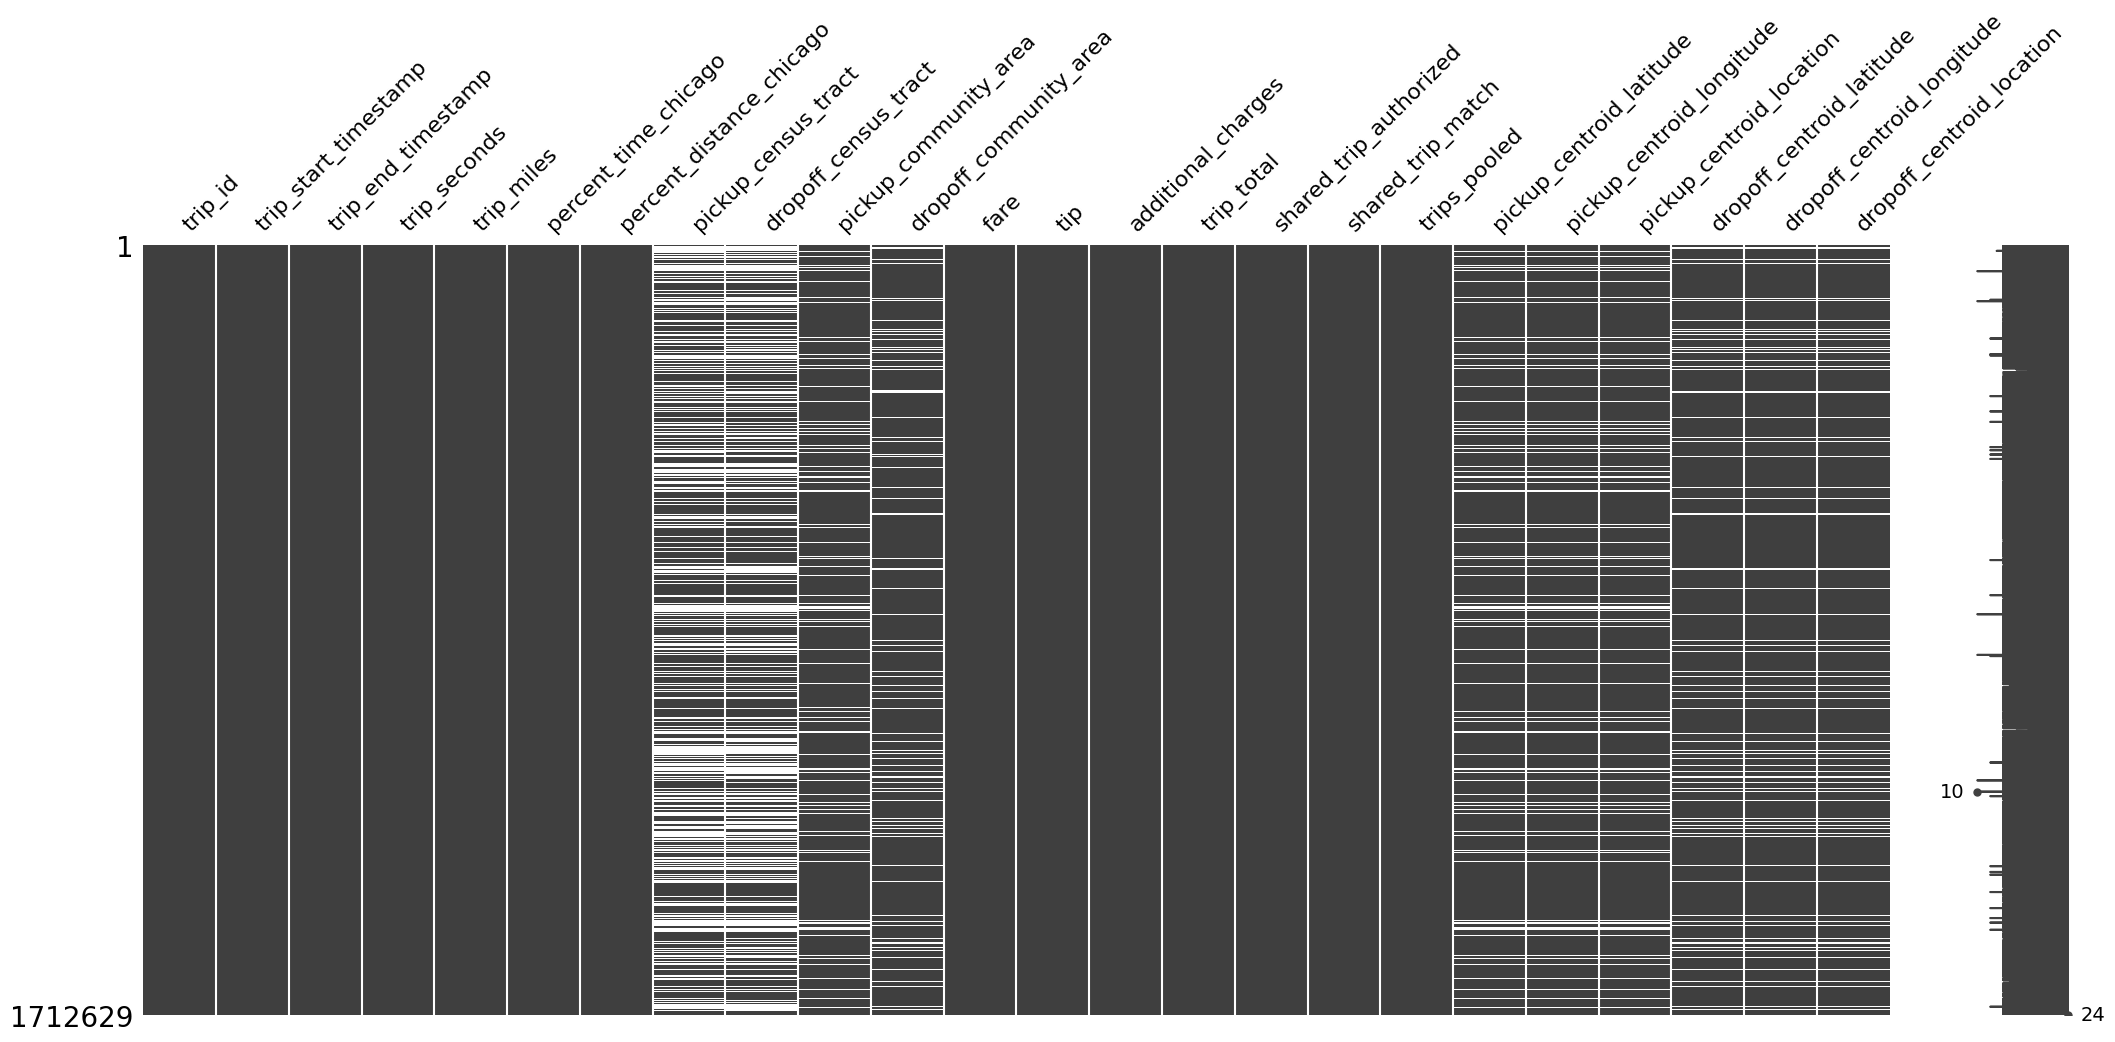

In [ ]:
# Missing values visualization
msno.matrix(data)
plt.show()

In [ ]:
# Percentage of missing values per column
missing_percentage = data.isnull().mean() * 100
print("Missing Percentage per column:\n", missing_percentage)

Missing Percentage per column:
 trip_id                        0.000000
trip_start_timestamp           0.000000
trip_end_timestamp             0.000000
trip_seconds                   0.000000
trip_miles                     0.000000
percent_time_chicago           0.011503
percent_distance_chicago       0.016641
pickup_census_tract           38.799355
dropoff_census_tract          39.022812
pickup_community_area          9.572242
dropoff_community_area         9.907283
fare                           0.207926
tip                            0.207926
additional_charges             0.207926
trip_total                     0.207926
shared_trip_authorized         0.000000
shared_trip_match              0.000000
trips_pooled                   0.000000
pickup_centroid_latitude       9.236910
pickup_centroid_longitude      9.236910
pickup_centroid_location       9.236910
dropoff_centroid_latitude      9.606459
dropoff_centroid_longitude     9.606459
dropoff_centroid_location      9.606459
dtype: f

In [ ]:
# Extract useful datetime features for seasonality analysis
data['trip_start_month'] = data['trip_start_timestamp'].dt.month
data['trip_start_day'] = data['trip_start_timestamp'].dt.day
data['trip_start_hour'] = data['trip_start_timestamp'].dt.hour
data['trip_start_dayofweek'] = data['trip_start_timestamp'].dt.dayofweek
data['day_of_week'] = data['trip_start_timestamp'].dt.day_name()


In [ ]:
data['date_and_day'] = data['trip_start_timestamp'].dt.strftime('%Y-%m-%d') + ' (' + data['day_of_week'] + ')'


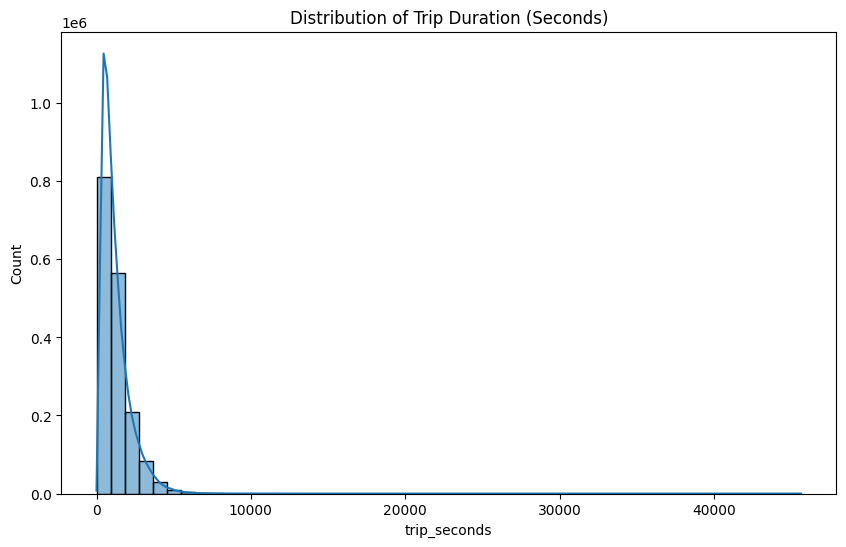

In [ ]:
# Plot distribution of trip seconds, miles, fare
plt.figure(figsize=(10,6))
sns.histplot(data['trip_seconds'], bins=50, kde=True)
plt.title('Distribution of Trip Duration (Seconds)')
plt.show()

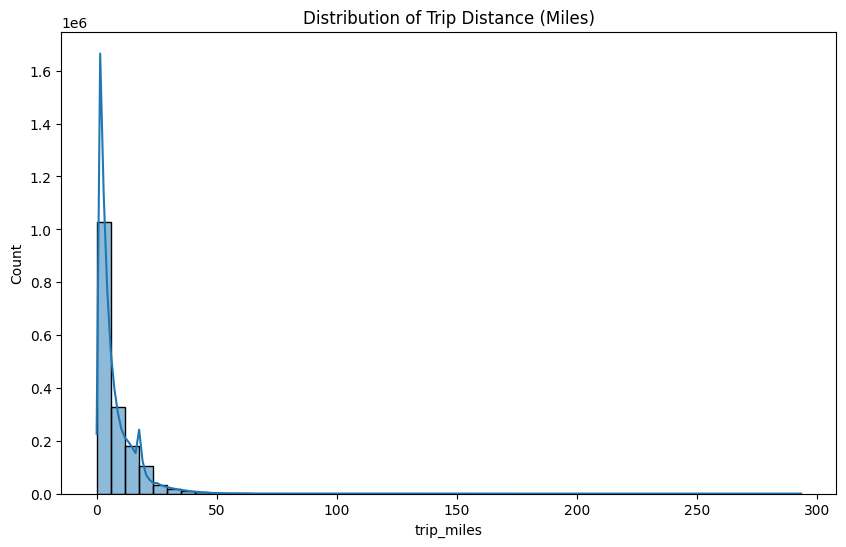

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['trip_miles'], bins=50, kde=True)
plt.title('Distribution of Trip Distance (Miles)')
plt.show()

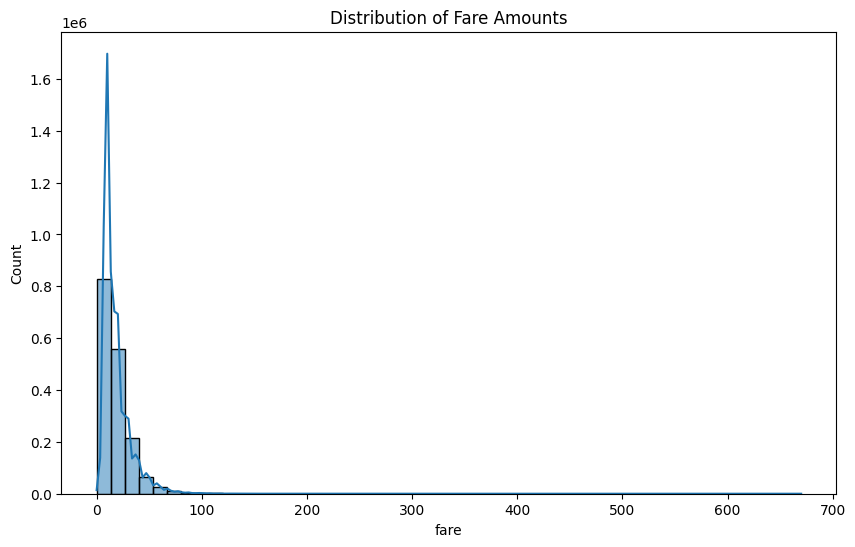

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['fare'], bins=50, kde=True)
plt.title('Distribution of Fare Amounts')
plt.show()

In [ ]:
# # Correlation heatmap
# plt.figure(figsize=(12,8))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap of Features')
# plt.show()

In [ ]:
data.columns

Index(['trip_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'percent_time_chicago', 'percent_distance_chicago',
       'pickup_census_tract', 'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tip', 'additional_charges',
       'trip_total', 'shared_trip_authorized', 'shared_trip_match',
       'trips_pooled', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'pickup_centroid_location', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'dropoff_centroid_location',
       'trip_start_month', 'trip_start_day', 'trip_start_hour',
       'trip_start_dayofweek'],
      dtype='object')

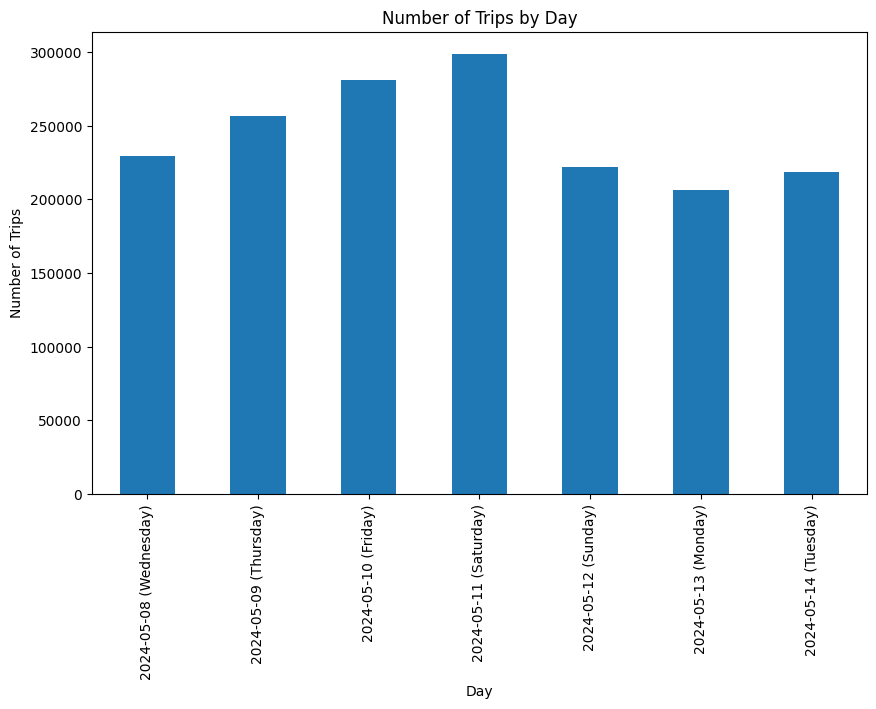

In [ ]:
# Seasonality: Trip counts per month
daily_trips = data.groupby('date_and_day')['trip_id'].count()
plt.figure(figsize=(10,6))
daily_trips.plot(kind='bar')
plt.title('Number of Trips by Day')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.show()

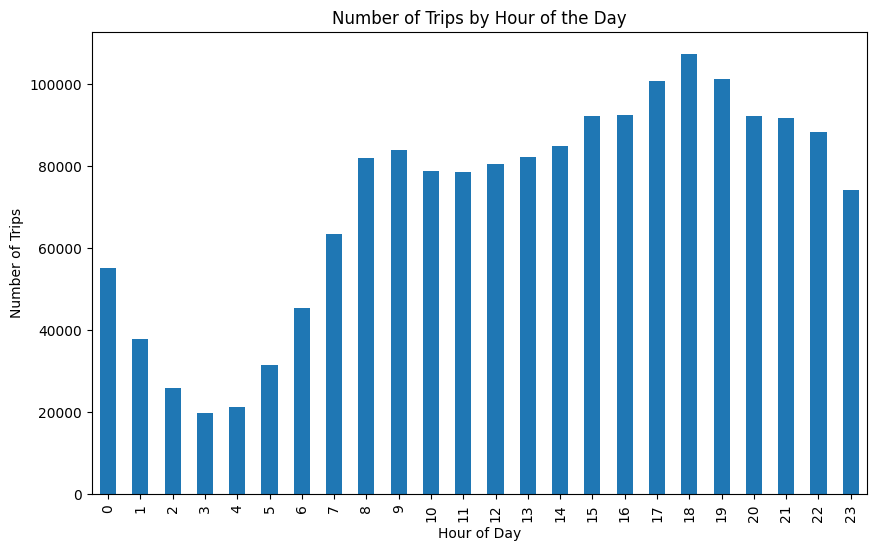

In [ ]:
# Seasonality: Trip counts per hour
hourly_trips = data.groupby('trip_start_hour')['trip_id'].count()
plt.figure(figsize=(10,6))
hourly_trips.plot(kind='bar')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Ensure 'trip_start_timestamp' is in datetime format
data['trip_start_timestamp'] = pd.to_datetime(data['trip_start_timestamp'])

# Extract hour and day of the week
data['hour'] = data['trip_start_timestamp'].dt.hour
data['day_of_week'] = data['trip_start_timestamp'].dt.day_name()

# Create a pivot table to show the number of trips per hour for each day of the week
hourly_trips = data.groupby(['day_of_week', 'hour'])['trip_id'].count().reset_index()

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_trips['day_of_week'] = pd.Categorical(hourly_trips['day_of_week'], categories=days_order, ordered=True)

# Create a pivot table for plotting (days as rows, hours as columns)
hourly_trips_pivot = hourly_trips.pivot(index='day_of_week', columns='hour', values='trip_id')

# Create a heatmap using Plotly
fig = px.imshow(
    hourly_trips_pivot,
    labels=dict(x='Hour of the Day', y='Day of the Week', color='Number of Trips'),
    x=hourly_trips_pivot.columns,
    y=hourly_trips_pivot.index,
    color_continuous_scale='Blues',
)

fig.update_layout(
    title='Number of Trips per Hour for Each Day of the Week',
    xaxis_title='Hour of the Day',
    yaxis_title='Day of the Week',
)

fig.show()
fig.write_html('num_trips_per_hour_per_week_day.html')

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Ensure 'trip_start_timestamp' is in datetime format
data['trip_start_timestamp'] = pd.to_datetime(data['trip_start_timestamp'])

# Extract hour and day of the week
data['hour'] = data['trip_start_timestamp'].dt.hour
data['day_of_week'] = data['trip_start_timestamp'].dt.day_name()

# Reorder the days of the week
days_order = ['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=days_order, ordered=True)

# Create a pivot table to show the number of trips per hour for each day of the week
hourly_trips = data.groupby(['day_of_week', 'hour'])['trip_id'].count().reset_index()

# Ensure correct sorting by day and hour
hourly_trips = hourly_trips.sort_values(['day_of_week', 'hour'])

# Create a new column for plotting
hourly_trips['day_hour'] = hourly_trips['day_of_week'].astype(str) + ' ' + hourly_trips['hour'].astype(str) + ':00'

# Create a figure
fig = go.Figure()

# Add a trace for the number of trips
fig.add_trace(go.Scatter(
    x=hourly_trips['day_hour'],
    y=hourly_trips['trip_id'],
    mode='lines+markers',
    name='Number of Trips',
    line=dict(shape='linear')
))

# Update layout
fig.update_layout(
    title='Number of Trips per Hour from Wednesday to Tuesday',
    xaxis_title='Day and Hour',
    yaxis_title='Number of Trips',
    xaxis=dict(
        tickmode='array',
        tickvals=hourly_trips['day_hour'],
        ticktext=[f"{day} {hour}:00" if hour in [0, 6, 12, 18] else '' for day, hour in zip(hourly_trips['day_of_week'], hourly_trips['hour'])],
        tickangle=-45
    )
)

# Show the plot
fig.show()
fig.write_html('trips_hour_day.html')


<ipython-input-86-61969e76ecf2>:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import STL

# Ensure 'trip_start_timestamp' is in datetime format
data['trip_start_timestamp'] = pd.to_datetime(data['trip_start_timestamp'])

# Group the data to get the number of trips per hour
hourly_trips = data.groupby(['trip_start_timestamp'])['trip_id'].count().reset_index()
hourly_trips.rename(columns={'trip_start_timestamp': 'timestamp', 'trip_id': 'number_of_trips'}, inplace=True)

# Set the timestamp as the index
hourly_trips.set_index('timestamp', inplace=True)

# Resample the data to hourly frequency
hourly_trips = hourly_trips.resample('h').sum()  # Use 'h' instead of 'H'

# Decompose the time series using STL
stl = STL(hourly_trips['number_of_trips'], seasonal=13)  # Adjust seasonal parameter as needed
result = stl.fit()

# Extract the trend component
trend = result.trend

# Extract the day of the week from the index
hourly_trips['day_of_week'] = hourly_trips.index.day_name()

# Reorder the days of the week for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_trips['day_of_week'] = pd.Categorical(hourly_trips['day_of_week'], categories=days_order, ordered=True)

# Group by day of the week and sum the trend component to get an average trend per day
trend_by_day = hourly_trips.groupby('day_of_week')['number_of_trips'].mean()

# Create a plotly figure for the trend by day of the week
fig = go.Figure()

# Plot the trend component by day of the week
fig.add_trace(go.Scatter(x=trend_by_day.index, y=trend_by_day, mode='lines+markers', name='Trend', line=dict(color='blue')))

# Update layout
fig.update_layout(
    title='Trend of Number of Trips by Day of the Week (Seasonality Removed)',
    xaxis_title='Day of the Week',
    yaxis_title='Average Number of Trips',
)

# Show the plot
fig.show()
fig.write_html('trend_of_num_trips_by_day.html')


<ipython-input-87-fdac4f8f49f0>:33: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

